<a href="https://colab.research.google.com/github/nguynphm56/Data_Mining/blob/main/Lab1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nhập liệu và thống kế những thông tin cơ bản của thuộc tính

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Đọc dữ liệu đầu vào

In [ ]:
with open('titanic.csv') as f: df = pd.read_csv(f, dtype={'age': np.float64,'sibsp': np.int64, 'parch': np.int64})

Xem xét dữ liệu ban đầu với hàm head() và info()

In [ ]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Thống kê chỉ số của các thuộc tính định lượng như: đến số giá trị, giá trị lớn nhất, nhỏ
nhất, trung bình, độ lệch chuẩn, tứ phân vị...

In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


2. Lấy ra 5 thuộc tính rỗng nhiều nhất

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100   
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)


,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


--> Có thể nhận thấy trường dữ liệu body thiếu dữ liệu nghiêm trọng (thiếu khoảng 90.8%), điều này ảnh hưởng xấu đến việc khai thác

3. Biểu đồ khảo sát sự liên quan giữa thuộc tính Age, Sex và thuộc tính quyết định - khả năng sống sót  (Survived)

<ipython-input-9-cb4a765d9c5e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
<ipython-input-9-cb4a765d9c5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived']==0].ag

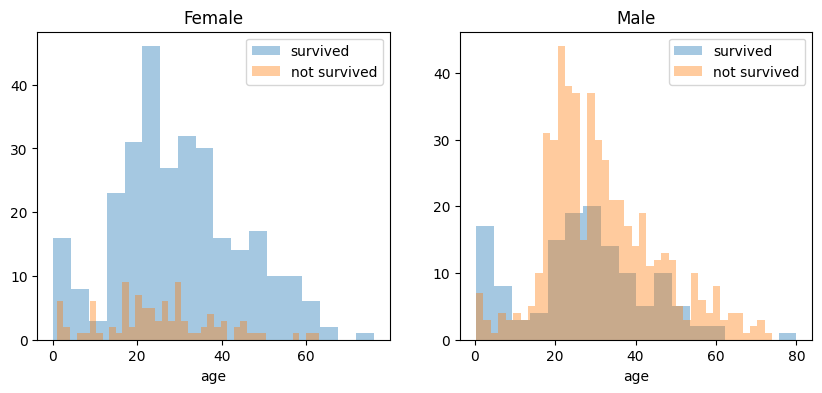

In [ ]:

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label=survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label=not_survived, ax = axes[1], kde = False)
ax.legend()
_=ax.set_title('Male')


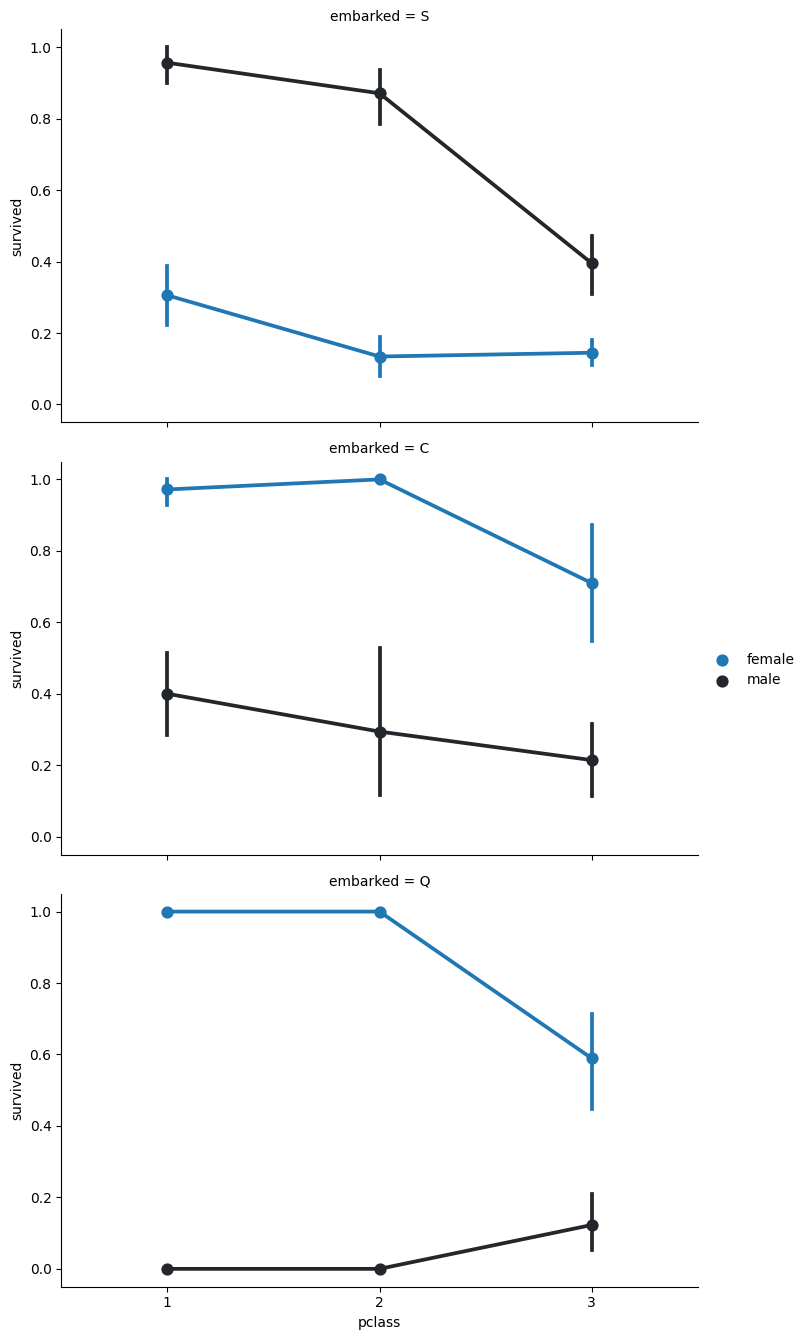

In [ ]:
FacetGrid = sns.FacetGrid(df, row='embarked', height = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot,'pclass','survived','sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<Axes: xlabel='pclass', ylabel='survived'>

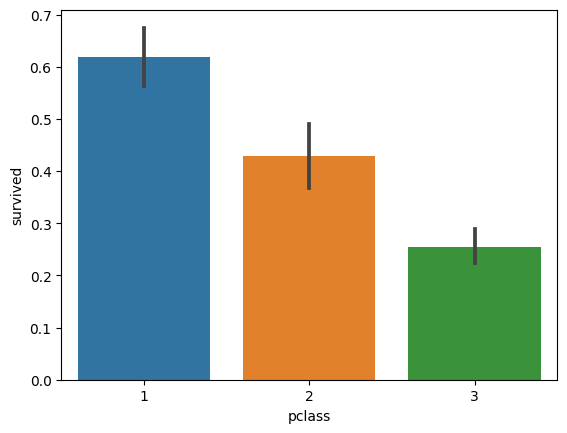

In [ ]:
sns.barplot(x='pclass',y='survived', data=df)

--> Nhận xét: 
+ Xác suất nam sống cao từ 1 đến 10 tuổi.
+ Cơ hội sống sót của nữ cao hơn từ 12 đến 40 tuổi.
+ Xác suất nam không sống sót cáo nhất trong khoảng 18 đến 27 tuổi.
+ Nhìn chung tỉ lệ sống sót của nữ ở các lứa tuổi đều cao hơn nam. 

4. Biểu đồ khảo sát sự liên quan giữa thuộc tính Cổng lên tàu(embarked) và loại vé (pclass) với khả năng sống sót (survived)
Phân biệt theo giới tính (sex)

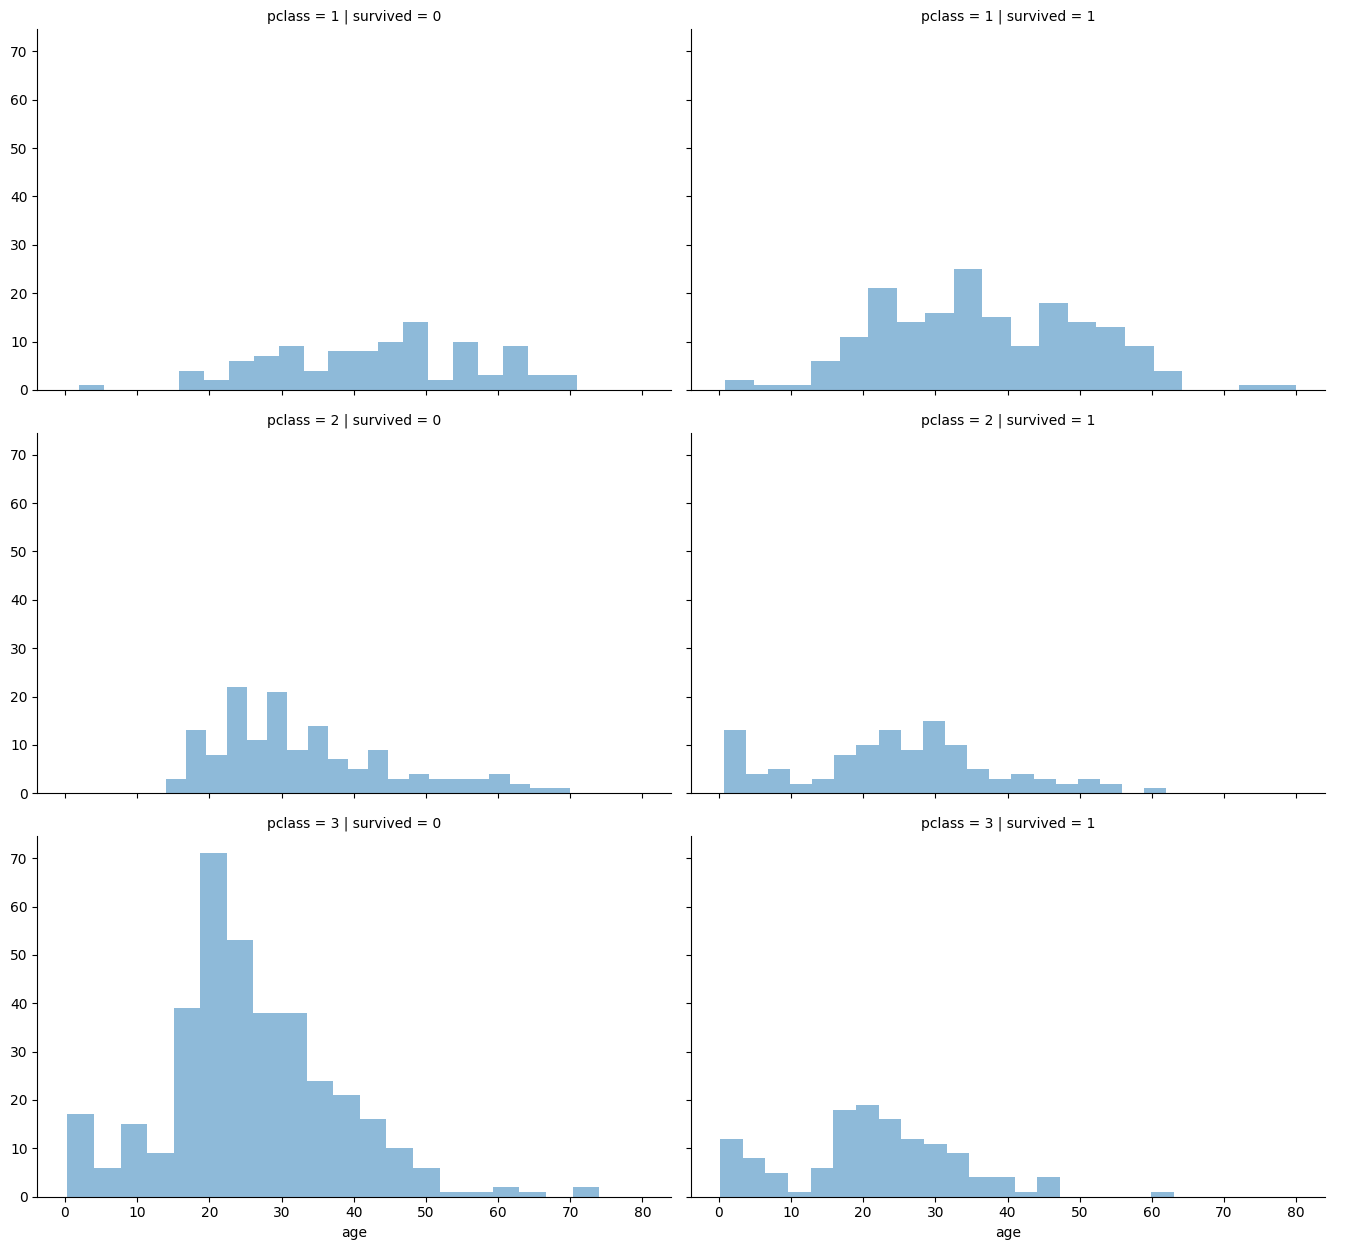

In [ ]:
grid = sns.FacetGrid(df,col='survived', row = 'pclass', height = 4.2, aspect = 1.6)
grid.map(plt.hist,'age',alpha=.5, bins=20)
grid.add_legend()

5.Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái) và khảo sát sự liên quan với thuộc tính quyết định.

In [ ]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp']+dataset['parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone'].value_counts()
df['not_alone'].value_counts()

1.0    790
0.0    519
Name: not_alone, dtype: int64

--> Nhận Xét:
+ Số người đi một mình là 790
+ Số người đi với người thân là 519

Biểu đồ biểu diễn mối quan hệ giữa số người đi cùng và khả năng sống sót:

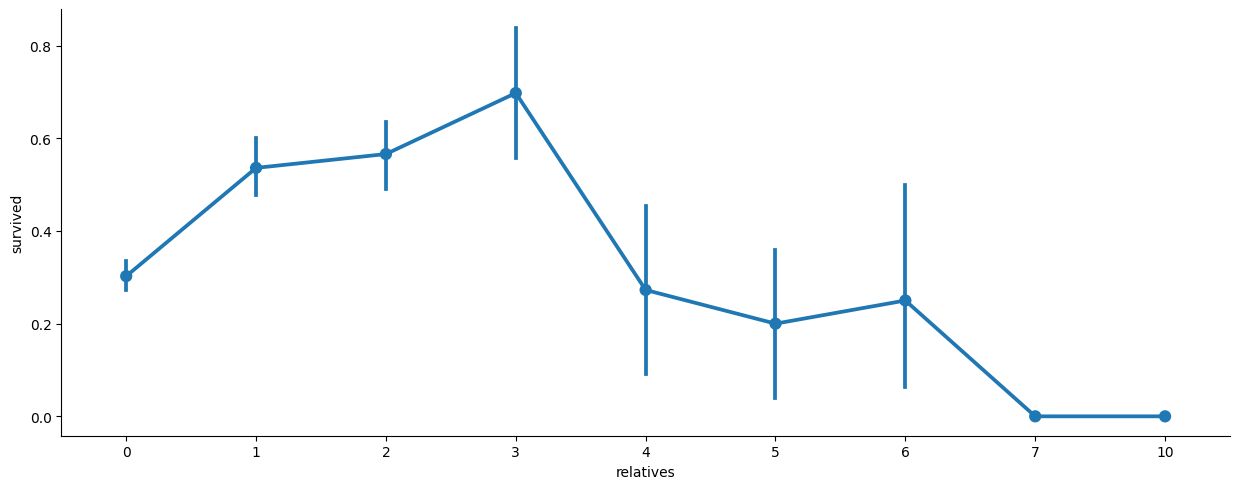

In [ ]:
axes = sns.catplot(data=df,x='relatives',y='survived', aspect = 2.5, kind='point',)

6.	Tiền xử lý các thuộc tính thiếu dữ liệu và xóa bỏ các thuộc tính không cần thiết.

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D":4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in [df]:
    dataset['cabin'] = dataset["cabin"].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z1]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
df = df.drop(['cabin'], axis =1)

In [ ]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",0,1.0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0.0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,3
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,3,NaN,"New York, NY",0,1.0,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,10,NaN,"Hudson, NY",1,0.0,4
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,NaN,NaN,"Belfast, NI",0,1.0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,D,NaN,"Bayside, Queens, NY",2,0.0,0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,NaN,22.0,"Montevideo, Uruguay",0,1.0,8


In [ ]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

Thuộc tính ticket có 929 giá trị khác nhau -> khả năng cao không giúp ích được trong quá trình khai thác
--> Xoá thuộc tính ticket và các thuộc tính không cần thiết (boat, body, home.dest)

In [ ]:
df=df.drop(['ticket'],axis=1)
df= df.drop(['boat'],axis=1)
df=df.drop(['body'],axis=1)
df=df.drop(['home.dest'],axis=1)

In [ ]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,0,1.0,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,3,0.0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,3,0.0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,3,0.0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,3,0.0,3
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.5500,S,0,1.0,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S,1,0.0,4
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,0.0000,S,0,1.0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S,2,0.0,0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,49.5042,C,0,1.0,8


In [ ]:
#Điền giá trị còn thiếu vào thuộc tính Age
for dataset in [df]:
    mean = df["age"].mean() 
    std = df["age"].std() 
    is_null = dataset["age"].isnull().sum() 
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_slice =  dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
df["age"].isnull().sum()


0

In [ ]:
#Điền giá trị còn thiếu vào thuộc tính embarked
df["embarked"].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [ ]:
common_value='S'
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

7. Xem xét các thuộc tính

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   float64
 11  deck       1309 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 122.8+ KB


Nhận xét:
+ Thuộc tính fare (giá vé) có giá trị nguyên nhưng ở định dạng float --> chuyển về số nguyên
+ Xử lý thuộc tính name (tên), sex (giới tính), embarked (cổng lên tàu)

In [ ]:
#Chuyển đổi thuộc tính giá vé (fare) về kiểu nguyên.
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [ ]:
#Xử lý thuộc tính name
titles = {"Mr":1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare":5 }
for dataset in [df]:
    dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.', expand=False) #tách các từ đứng trước . trong cột name -> title
    dataset['title'] = dataset['title'].replace(['lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['title'] = dataset['title'].replace('Mlle','Miss') #đổi Mlle --> Miss
    dataset['title'] = dataset['title'].replace('Mme','Mrs')   #đổi Mme --> Mrs
#cover  
    dataset['title'] = dataset['title'].map(titles) # kết hợp titles chuyển tiêu đề thành các số nguyên, Mr-> 1, Mrs -> 2, Rare -> 3
#Điền giá trị NaN(nếu có) cột title là 0
    dataset['title'] = dataset['title'].fillna(0)
df=df.drop(['name'], axis = 1)

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title
0,1,1,female,29,0,0,211,S,0,1.0,2,2.0
1,1,1,male,0,1,2,151,S,3,0.0,3,4.0
2,1,0,female,2,1,2,151,S,3,0.0,3,2.0
3,1,0,male,30,1,2,151,S,3,0.0,3,1.0
4,1,0,female,25,1,2,151,S,3,0.0,3,3.0
5,1,1,male,48,0,0,26,S,0,1.0,0,1.0
6,1,1,female,63,1,0,77,S,1,0.0,4,2.0
7,1,0,male,39,0,0,0,S,0,1.0,1,1.0
8,1,1,female,53,2,0,51,S,2,0.0,0,3.0
9,1,0,male,71,0,0,49,C,0,1.0,8,1.0


Biểu diễn thuộc tính sex (giới tính) thành các giá trị 0 và 1

In [ ]:
genders = {"male": 0, "female": 1}

for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(genders)
    

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title
0,1,1,1,29,0,0,211,S,0,1.0,2,2.0
1,1,1,0,0,1,2,151,S,3,0.0,3,4.0
2,1,0,1,2,1,2,151,S,3,0.0,3,2.0
3,1,0,0,30,1,2,151,S,3,0.0,3,1.0
4,1,0,1,25,1,2,151,S,3,0.0,3,3.0
5,1,1,0,48,0,0,26,S,0,1.0,0,1.0
6,1,1,1,63,1,0,77,S,1,0.0,4,2.0
7,1,0,0,39,0,0,0,S,0,1.0,1,1.0
8,1,1,1,53,2,0,51,S,2,0.0,0,3.0
9,1,0,0,71,0,0,49,C,0,1.0,8,1.0


In [ ]:
#Chuyển đổi thuộc tính emberked (Cổng lên tàu) thành số
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [ ]:
#check kết quả
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title
0,1,1,1,29,0,0,211,0,0,1.0,2,2.0
1,1,1,0,0,1,2,151,0,3,0.0,3,4.0
2,1,0,1,2,1,2,151,0,3,0.0,3,2.0
3,1,0,0,30,1,2,151,0,3,0.0,3,1.0
4,1,0,1,25,1,2,151,0,3,0.0,3,3.0
5,1,1,0,48,0,0,26,0,0,1.0,0,1.0
6,1,1,1,63,1,0,77,0,1,0.0,4,2.0
7,1,0,0,39,0,0,0,0,0,1.0,1,1.0
8,1,1,1,53,2,0,51,0,2,0.0,0,3.0
9,1,0,0,71,0,0,49,1,0,1.0,8,1.0


In [ ]:
#Chuyển đổi theo nhóm tuổi
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age']<=11,'age'] = 0
    dataset.loc[(dataset['age']>11)&(dataset['age']<=18),'age'] = 1
    dataset.loc[(dataset['age']>18)&(dataset['age']<=22),'age'] = 2
    dataset.loc[(dataset['age']>22)&(dataset['age']<=27),'age'] = 3
    dataset.loc[(dataset['age']>27)&(dataset['age']<=33),'age'] = 4
    dataset.loc[(dataset['age']>33)&(dataset['age']<=40),'age'] = 5
    dataset.loc[(dataset['age']>40)&(dataset['age']<=66),'age'] = 6
    dataset.loc[(dataset['age']>66),'age'] = 7

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title
0,1,1,1,4,0,0,211,0,0,1.0,2,2.0
1,1,1,0,0,1,2,151,0,3,0.0,3,4.0
2,1,0,1,0,1,2,151,0,3,0.0,3,2.0
3,1,0,0,4,1,2,151,0,3,0.0,3,1.0
4,1,0,1,3,1,2,151,0,3,0.0,3,3.0
5,1,1,0,6,0,0,26,0,0,1.0,0,1.0
6,1,1,1,6,1,0,77,0,1,0.0,4,2.0
7,1,0,0,5,0,0,0,0,0,1.0,1,1.0
8,1,1,1,6,2,0,51,0,2,0.0,0,3.0
9,1,0,0,7,0,0,49,1,0,1.0,8,1.0


In [ ]:
#Kiểm tra kết quả
df['age'].value_counts()

6    243
4    230
3    216
5    207
2    170
1    143
0     91
7      9
Name: age, dtype: int64

In [ ]:
#Thuộc tính fare(giá vé) làm tương tự như thuộc tính Age
for dataset in [df]:
    dataset['fare']=dataset['fare'].astype(int)
    dataset.loc[dataset['fare']<=7.91,'fare']=0
    dataset.loc[(dataset['fare']>7.91) & (dataset['fare']<=14.454),'fare']=1
    dataset.loc[(dataset['fare']>14.454) & (dataset['fare']<=31),'fare']=2
    dataset.loc[(dataset['fare']>31) & (dataset['fare']<=99),'fare']=3
    dataset.loc[(dataset['fare']>99) & (dataset['fare']<=250),'fare']=4
    dataset.loc[dataset['fare']>250,'fare']=5

In [ ]:
df['fare'].value_counts()

0    361
2    325
1    312
3    227
4     67
5     17
Name: fare, dtype: int64

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title
0,1,1,1,4,0,0,4,0,0,1.0,2,2.0
1,1,1,0,0,1,2,4,0,3,0.0,3,4.0
2,1,0,1,0,1,2,4,0,3,0.0,3,2.0
3,1,0,0,4,1,2,4,0,3,0.0,3,1.0
4,1,0,1,3,1,2,4,0,3,0.0,3,3.0
5,1,1,0,6,0,0,2,0,0,1.0,0,1.0
6,1,1,1,6,1,0,3,0,1,0.0,4,2.0
7,1,0,0,5,0,0,0,0,0,1.0,1,1.0
8,1,1,1,6,2,0,3,0,2,0.0,0,3.0
9,1,0,0,7,0,0,3,1,0,1.0,8,1.0


8. Tạo thuộc tính tuổi * loại vé(age_class)

In [ ]:
for dataset in [df]:
    dataset['age_class'] = dataset['age'] * dataset['pclass']

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class
0,1,1,1,4,0,0,4,0,0,1.0,2,2.0,4
1,1,1,0,0,1,2,4,0,3,0.0,3,4.0,0
2,1,0,1,0,1,2,4,0,3,0.0,3,2.0,0
3,1,0,0,4,1,2,4,0,3,0.0,3,1.0,4
4,1,0,1,3,1,2,4,0,3,0.0,3,3.0,3
5,1,1,0,6,0,0,2,0,0,1.0,0,1.0,6
6,1,1,1,6,1,0,3,0,1,0.0,4,2.0,6
7,1,0,0,5,0,0,0,0,0,1.0,1,1.0,5
8,1,1,1,6,2,0,3,0,2,0.0,0,3.0,6
9,1,0,0,7,0,0,3,1,0,1.0,8,1.0,7


In [ ]:
#Thuộc tính giá vé trên mỗi người
for dataset in [df]:
    dataset['fare_per_verson'] = dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_verson'] = dataset['fare_per_verson'].astype(int)

In [ ]:
df.head(12)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_verson
0,1,1,1,4,0,0,4,0,0,1.0,2,2.0,4,4
1,1,1,0,0,1,2,4,0,3,0.0,3,4.0,0,1
2,1,0,1,0,1,2,4,0,3,0.0,3,2.0,0,1
3,1,0,0,4,1,2,4,0,3,0.0,3,1.0,4,1
4,1,0,1,3,1,2,4,0,3,0.0,3,3.0,3,1
5,1,1,0,6,0,0,2,0,0,1.0,0,1.0,6,2
6,1,1,1,6,1,0,3,0,1,0.0,4,2.0,6,1
7,1,0,0,5,0,0,0,0,0,1.0,1,1.0,5,0
8,1,1,1,6,2,0,3,0,2,0.0,0,3.0,6,1
9,1,0,0,7,0,0,3,1,0,1.0,8,1.0,7,3
